In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
display(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# The above dataset consists of the data which consists the features and targets which consists of the lables like malignant and benign
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [5]:
print(label_names)
print(labels)
print(feature_names)
print(features)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [6]:
# Checking for the data imbalance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Use value_counts to get the counts of each target value
disease_counts = df['target'].value_counts()
temp_df = pd.DataFrame({
    "label" : disease_counts.index,
    "counts" : disease_counts.values
})
display(temp_df)

,label,counts
0,1,357
1,0,212


# Data Balancing using SMOTE Technique

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,random_state=0)
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_train,y_train = smote.fit_resample(xtrain,ytrain)
print(pd.Series(y_train).value_counts())

1    290
0    290
dtype: int64


# Building Model

accuracy score of SVC : 0.9298245614035088
confusion matrix of SVC


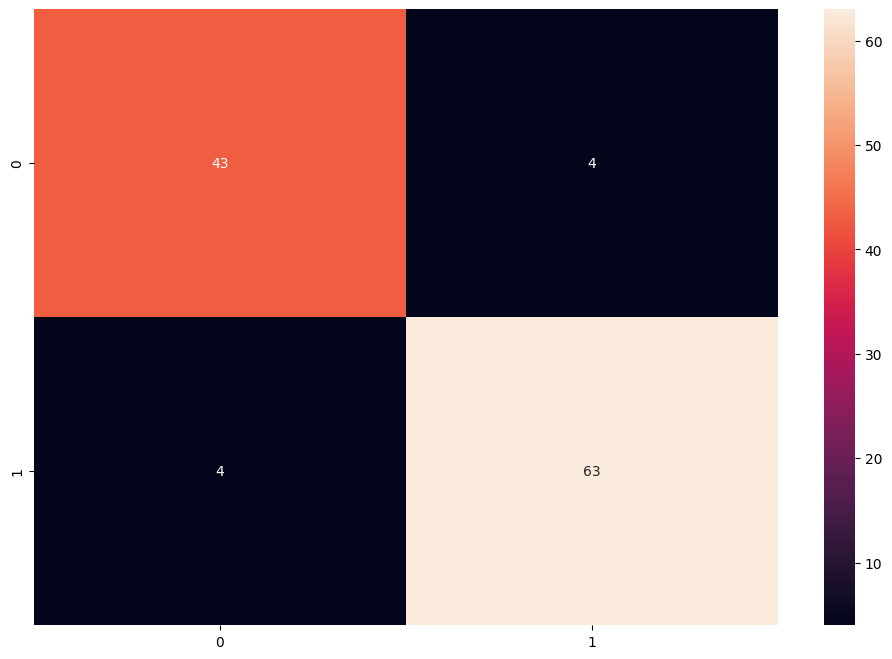

accuracy score of nb : 0.9298245614035088
confusion matrix of nb


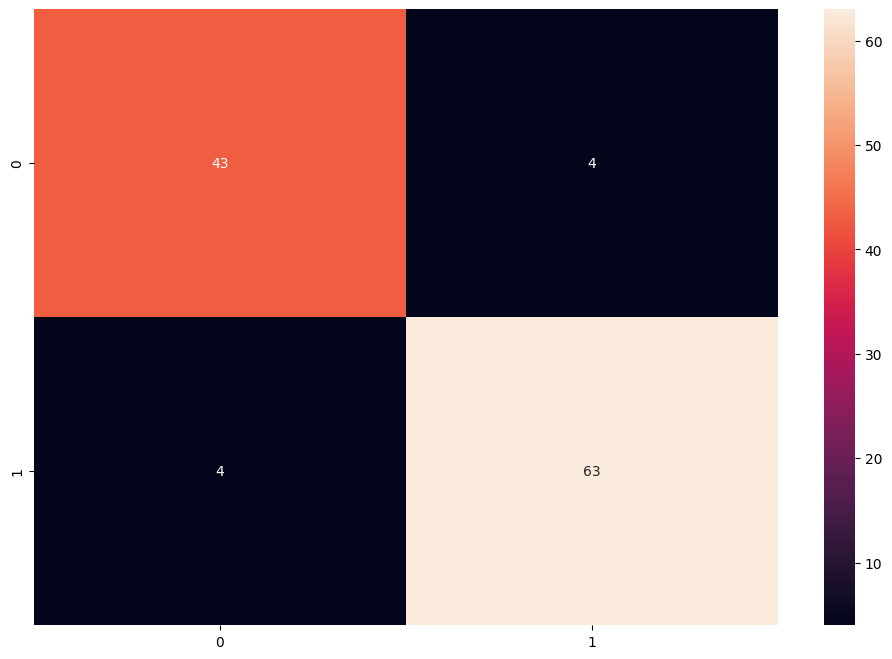

accuracy score of rf : 0.9473684210526315
confusion matrix of rf


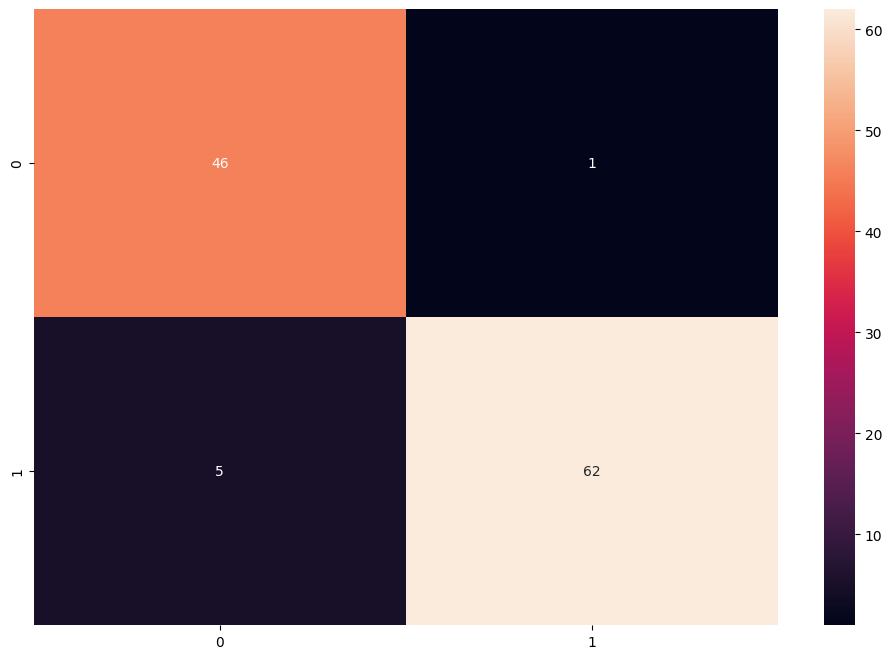

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

models={
    "SVC":SVC(),
    "nb":GaussianNB(),
    "rf":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    pred = model.predict(xtest)
    score = accuracy_score(ytest,pred)
    print(f"accuracy score of {model_name} : {score}")
    print(f"confusion matrix of {model_name}")
    conf_mat = confusion_matrix(ytest,pred)
    plt.figure(figsize=(12,8))
    sns.heatmap(conf_mat,annot=True)
    plt.show()

accuracy score of final model : 0.9473684210526315
confusion matrix of final model


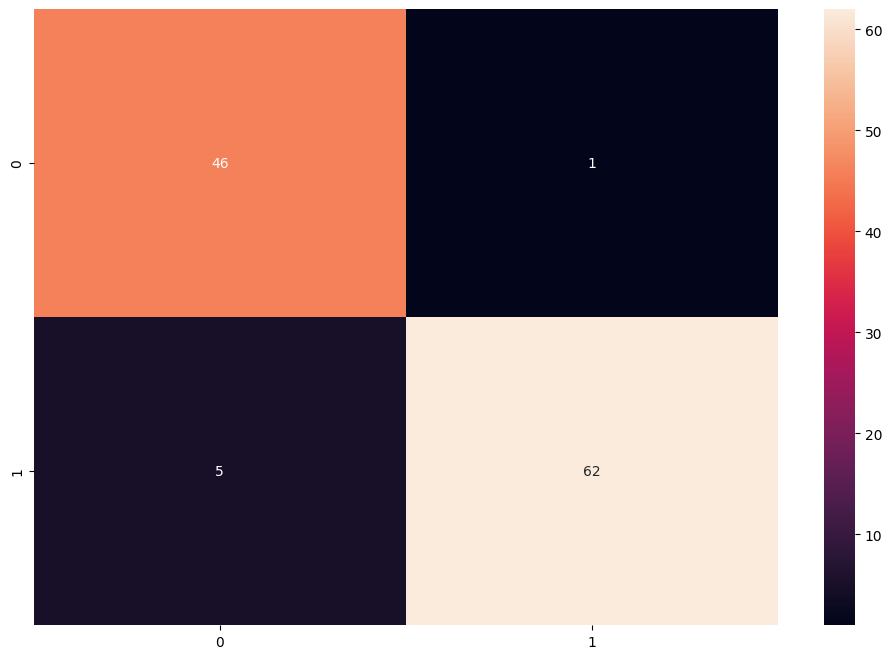

In [9]:
# from the above confusion matrix randomforest method seems like a viable option
final_model = RandomForestClassifier(random_state=18)
final_model.fit(x_train, y_train)
final_pred = final_model.predict(xtest)
score = accuracy_score(ytest,final_pred)
print(f"accuracy score of final model : {score}")
print(f"confusion matrix of final model")
conf_mat = confusion_matrix(ytest,pred)
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat,annot=True)
plt.show()